In [2]:
# Importing all needed libraries and functions
import sys
sys.path.append('../src')
from functions import *

## Task 3: BMI prediction using regression models and metagenomic data

### Importing data and training the regression models

In [3]:
# Set paths for the datasets
DATA_PATH = os.path.join('..', 'data')
dev_set_path = os.path.join(DATA_PATH, "assignment1_dev_set.csv")
val_set_path = os.path.join(DATA_PATH, "assignment1_val_set.csv")

In [4]:
data_dev = data_clean(dev_set_path)
data_val = data_clean(val_set_path)


No NA values found.

No NA values found.


In [5]:
results_ml_optuna, feature_importances_optuna = evaluate_microbiome_models_test(data_dev, data_val, use_optuna=True, optuna_trials=25)


=== Evaluating ElasticNet ===
Using Optuna for hyperparameter optimization...
Optimizing model - 25 trials... Best neg_root_mean_squared_error: -3.7112
Using Optuna for hyperparameter optimization...
Optimizing model - 25 trials... Best neg_root_mean_squared_error: -3.6908
Using Optuna for hyperparameter optimization...
Optimizing model - 25 trials... Best neg_root_mean_squared_error: -3.8122
Using Optuna for hyperparameter optimization...
Optimizing model - 25 trials... Best neg_root_mean_squared_error: -3.5705
Using Optuna for hyperparameter optimization...
Optimizing model - 25 trials... Best neg_root_mean_squared_error: -3.8455
Using Optuna for hyperparameter optimization...
Optimizing model - 25 trials... Best neg_root_mean_squared_error: -3.5830
Using Optuna for hyperparameter optimization...
Optimizing model - 25 trials... Best neg_root_mean_squared_error: -3.3270
Using Optuna for hyperparameter optimization...
Optimizing model - 25 trials... Best neg_root_mean_squared_error: -

### Ploting the results and checking for overfitting

In [6]:
feature_importances_optuna

,Model,feature,importance
0,ElasticNet,Clostridium symbiosum,0.338938
1,ElasticNet,Odoribacter splanchnicus,0.183919
2,ElasticNet,Desulfovibrio fairfieldensis,0.180392
3,ElasticNet,Ruminococcus champanellensis,0.179541
4,ElasticNet,Eubacterium dolichum,0.173762
...,...,...,...
265,BayesianRidge,Prevotella ruminicola,0.018773
266,BayesianRidge,Lactococcus lactis,0.018227
267,BayesianRidge,Holdemania filiformis,0.017921
268,BayesianRidge,Clostridium sphenoides,0.017271


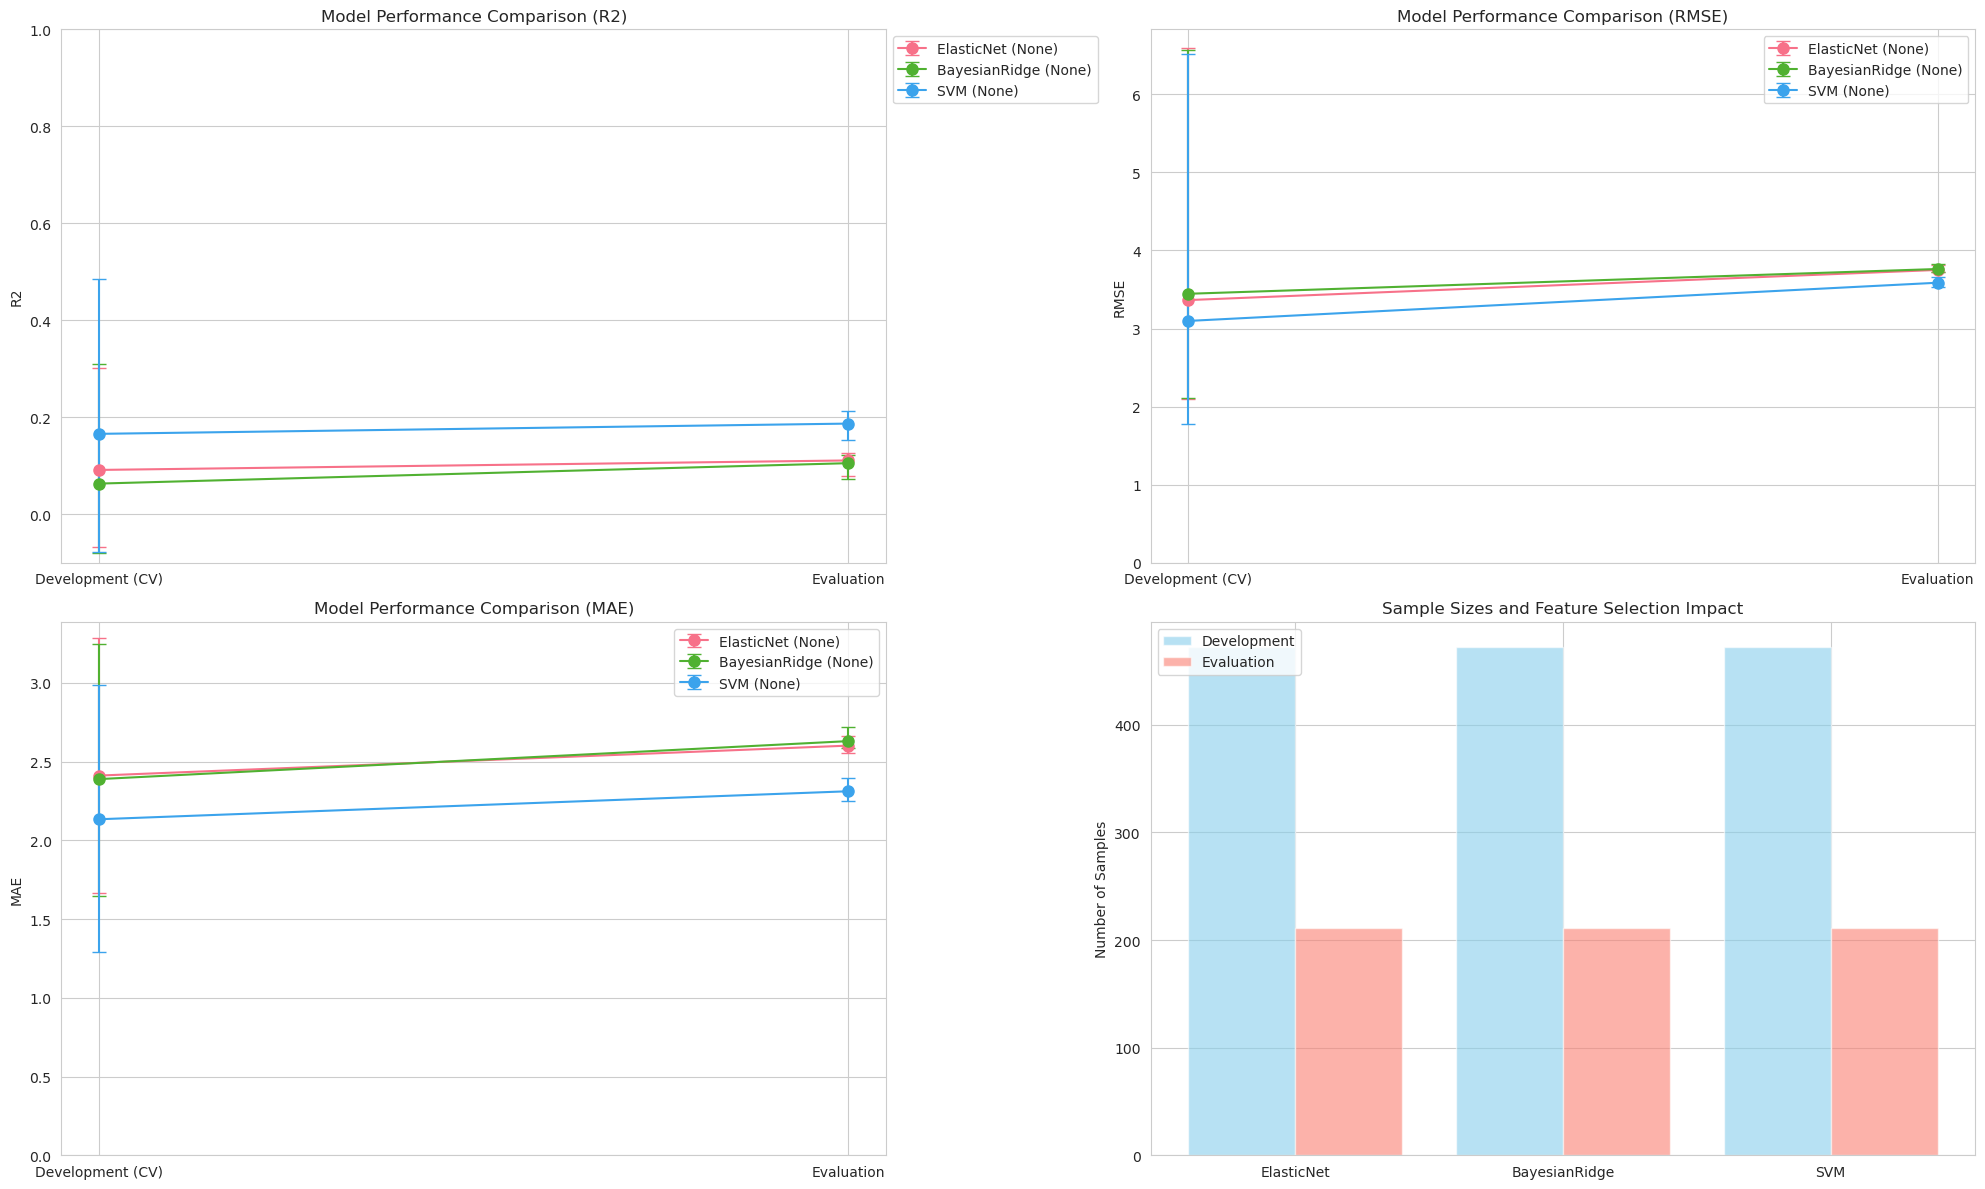


=== Detailed Performance Metrics ===

R2 Scores (median with 95% CI):


,Model,Feature_Selection,Dev_R2,Eval_R2
0,ElasticNet,None,0.091 (-0.068-0.302),0.111 (0.080-0.126)
1,BayesianRidge,None,0.063 (-0.080-0.311),0.105 (0.072-0.123)
2,SVM,None,0.166 (-0.079-0.485),0.187 (0.154-0.213)



RMSE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_RMSE,Eval_RMSE
0,ElasticNet,None,3.364 (2.102-6.591),3.750 (3.718-3.816)
1,BayesianRidge,None,3.445 (2.110-6.567),3.762 (3.726-3.832)
2,SVM,None,3.097 (1.774-6.518),3.587 (3.528-3.659)



MAE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_MAE,Eval_MAE
0,ElasticNet,None,2.412 (1.666-3.288),2.602 (2.558-2.661)
1,BayesianRidge,None,2.389 (1.649-3.248),2.631 (2.590-2.722)
2,SVM,None,2.134 (1.289-2.988),2.312 (2.252-2.394)


In [7]:
plot_model_results_final(results_ml_optuna)

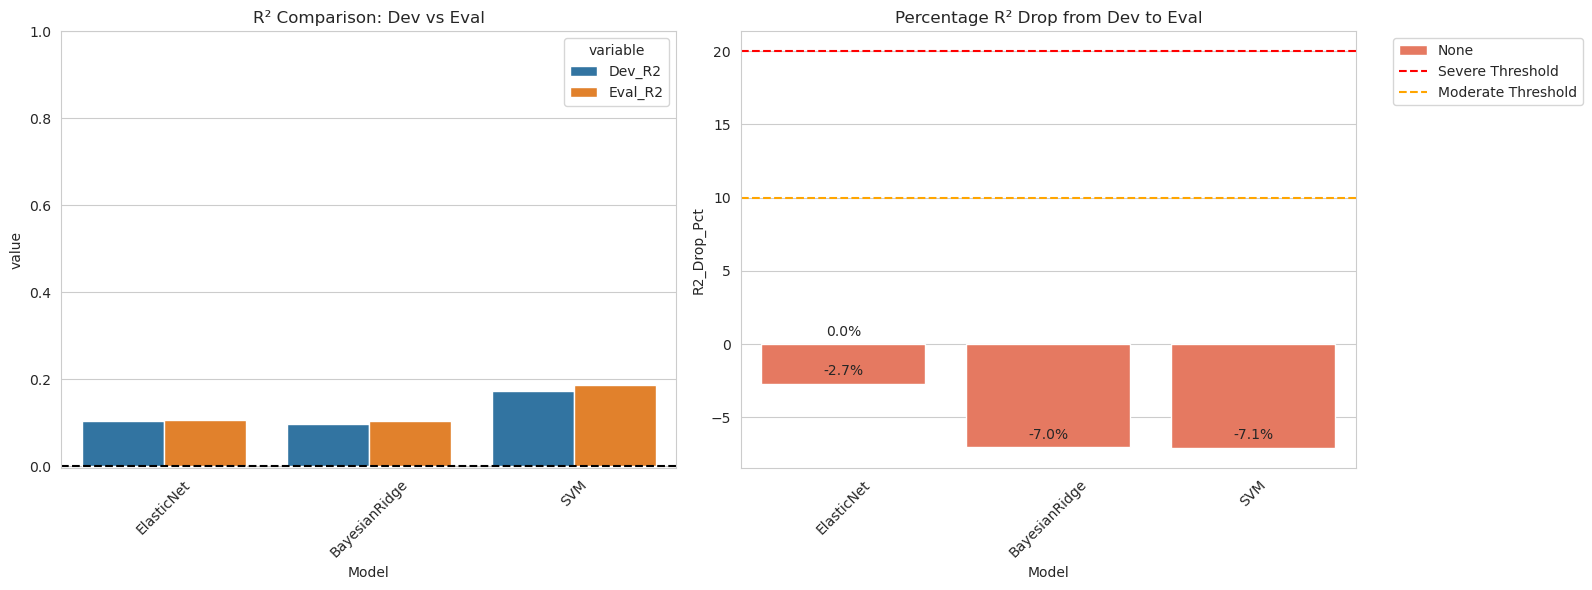

Overfitting status: none
Failed checks: []


,Model,Feature_Selection,Dev_R2,Eval_R2,R2_Drop_Pct,Dev_RMSE,Eval_RMSE,RMSE_Increase_Pct,Dev_Eval_Ratio,Overfitting_Risk
0,ElasticNet,None,0.104007,0.106841,-2.725512,3.748471,3.759161,0.285188,0.973468,Low
1,BayesianRidge,None,0.096253,0.103023,-7.033981,3.760025,3.767184,0.190394,0.934283,Low
2,SVM,None,0.173664,0.185990,-7.097793,3.625428,3.588589,-1.016111,0.933726,Low


In [9]:
# Initialize analyzer with threshold
analyzer = OverfittingAnalyzer(threshold=0.2)

# Perform complete analysis with visualization
results = analyzer.analyze(results_ml_optuna, plot=True)

# Access analysis components
print("Overfitting status:", results['overfitting_status'])
print("Failed checks:", results['failed_checks'])
display(results['metrics'].style.background_gradient(
    subset=['R2_Drop_Pct', 'RMSE_Increase_Pct'], 
    cmap='Reds'
))